# Упражнение 4.1

In [ ]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2024-06-13 12:32:13--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2024-06-13 12:32:13--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48574 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.44K  --.-KB/s    in 0.01s   

2024-06-13 12:32:13 (3.72 MB/s) - ‘thinkdsp.py’ saved [48574/48574]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate


Возьмем две записи: шум моря и стрекот сверчков. Выделим из звуков сегменты и построим спектры, полученных сигналов

In [21]:
from thinkdsp import read_wave
crickets_wave = read_wave("crickets.wav")
crickets_wave.make_audio()


In [26]:
fire_wave = read_wave("17730__royal__fireplace.wav")
fire_wave.make_audio()

In [28]:
fire_segment = fire_wave.segment(start=1.5, duration=1.0)
fire_segment.make_audio()

Получим спектр сегмента:

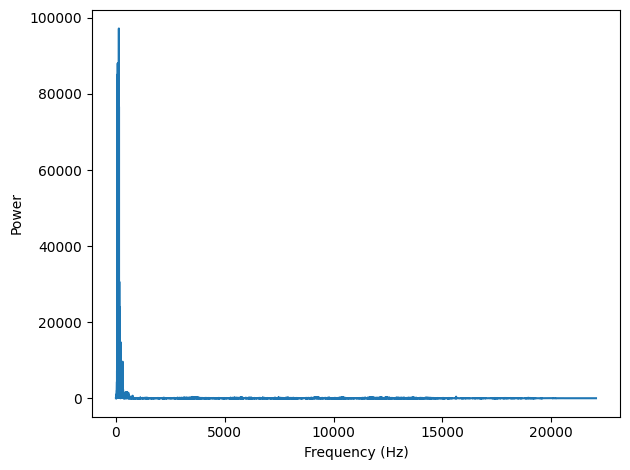

In [29]:
fire_spectrum = fire_segment.make_spectrum()
fire_spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

Из полученного графика видно, что зависимость падения амплитуды от частоты отдаленно напоминает розовый или белый шум (то есть линейна). Взглянем на спектр мощности в логарифмическом масштабе

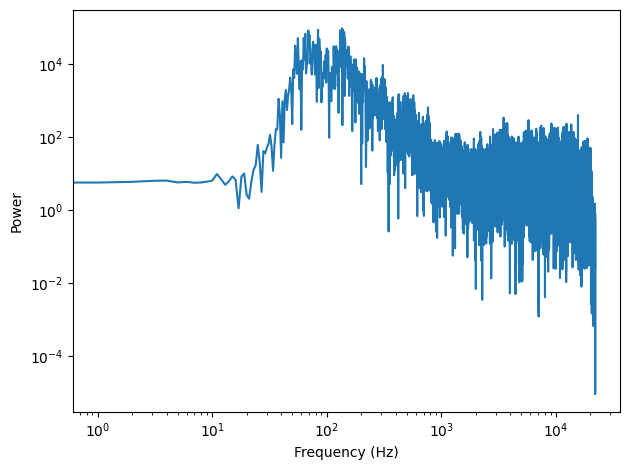

In [30]:
fire_spectrum.plot_power()

loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

Структура с восходящей, а затем падающей амплитудой характерна для естестественного шума. Можно рассмотреть еще один сегмент для того, чтобы понять как спектр изменяется во времени

In [31]:
segment2 = fire_wave.segment(start=2.5, duration=1.0)
segment2.make_audio()

Затем, отрисуем два спектра на графике:

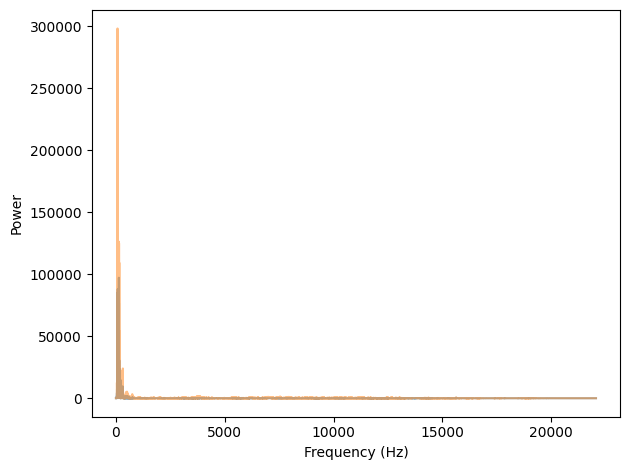

In [35]:
spectrum2 = segment2.make_spectrum()

fire_spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

Построим логарифмический график:

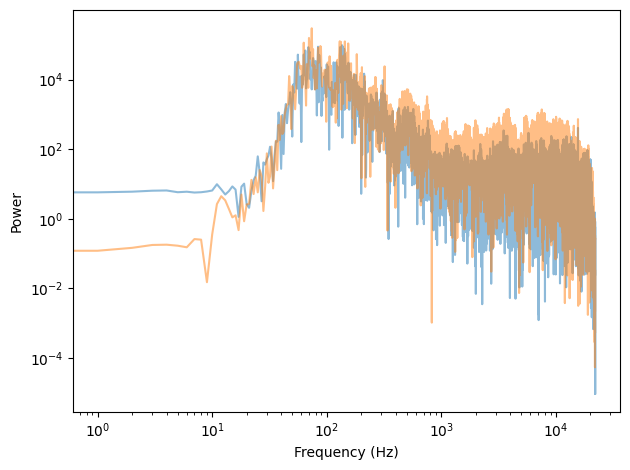

In [36]:
fire_spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

Таким образом, видим что структура спектра постоянна во времени.

# Упражнение 4.2

Создадим метод barlet_method, который будет брать сигнал, разделять его на сегменты и вычислять спектр мощности для каждого сегмента и находить среднее по сегментам. Для этого нужно в аргументы функции передадим сам сигнал и желаемую длину каждого сегмента. Затем вычислим спектр sp и выделим из него отдельные спектры specs. Затем выделим массив psds мощностей из каждого полученного спектра. Вычислим среднюю мощность hs начального сигнала

In [40]:
from thinkdsp import Spectrum
def bartlett_method(wave, seg_length=512, win_flag=True):
    """Estimates the power spectrum of a noise wave.

    wave: Wave
    seg_length: segment length
    """
    # make a spectrogram and extract the spectrums
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()

    # extract the power array from each spectrum
    psds = [spectrum.power for spectrum in spectrums]

    # compute the root mean power (which is like an amplitude)
    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs

    # make a Spectrum with the mean amplitudes
    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

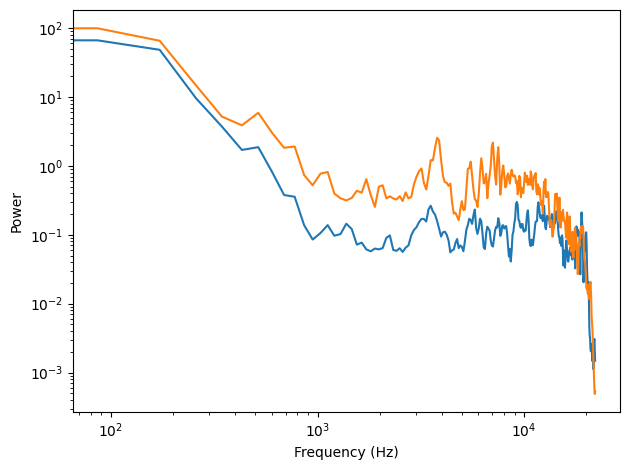

In [41]:
psd = bartlett_method(fire_segment)
psd2 = bartlett_method(segment2)

psd.plot_power()
psd2.plot_power()

decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

Теперь зависимость видна более четко. Видно, что зависимость является линейной не на всех участках.

# Упражнение 4.3

btc.csv файл содержит исторические данные о ежедневной цене биткоина. Откроем этот файл и вычислим спектр цен как функцию от времени

In [73]:
import pandas as pd

df = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv',
                 parse_dates=[0])
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2354,BTC,2020-03-22,5884.340133,6187.042146,6431.873162,5802.553402
2355,BTC,2020-03-23,6455.454688,5829.352511,6620.858253,5694.198299
2356,BTC,2020-03-24,6784.318011,6455.450650,6863.602196,6406.037439
2357,BTC,2020-03-25,6706.985089,6784.325204,6981.720386,6488.111885


In [75]:
ys = df['Closing Price (USD)']
ts = df.index

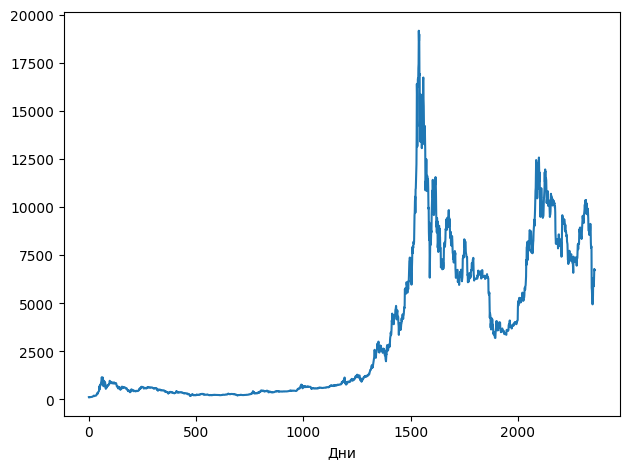

In [78]:
from thinkdsp import Wave

wave = Wave(ys, ts, framerate=1)
wave.plot()
decorate(xlabel='Дни')

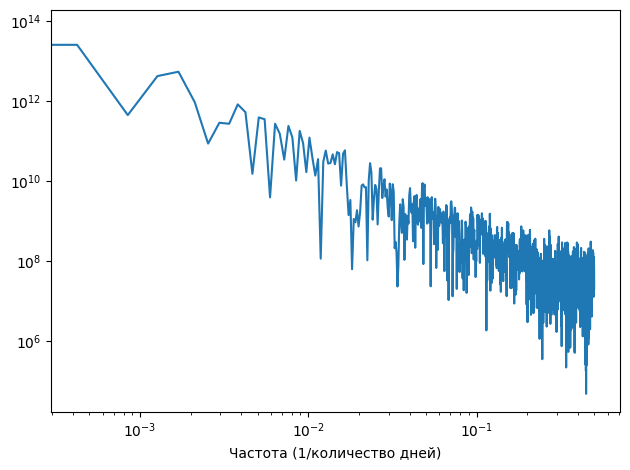

In [79]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Частота (1/количество дней)',
         **loglog)

In [80]:
spectrum.estimate_slope()[0]

-1.7332540936758951

Slope близок к -2, что соответствует наклону красного шума.

# Упражнение 4.4

Напишем класс UncorrelatedPoissonNoise, который наследуется от класса thinkdsp._Noise, который моделирует некоррелированный пуассоновский шум (UP). Для этого переопределим функцию evaluate, в которой используем метод np.random.poisson(). Параметр этой функции lam - среднее число частиц за время каждого интервала.

In [83]:
from thinkdsp import Noise

class UncorrelatedPoissonNoise(Noise):
    def evaluate(self, ts):
        ys = np.random.poisson(self.amp, len(ts))
        return ys


Сгенерируем сигнал с маленькой амплитудой (0.001) на основе этого класса. Ожидается услышать звук, как у счетчика Гейгера.

In [84]:
signal = UncorrelatedPoissonNoise(amp=0.001)
wave = signal.make_wave(duration=2, framerate=10000)
wave.make_audio()


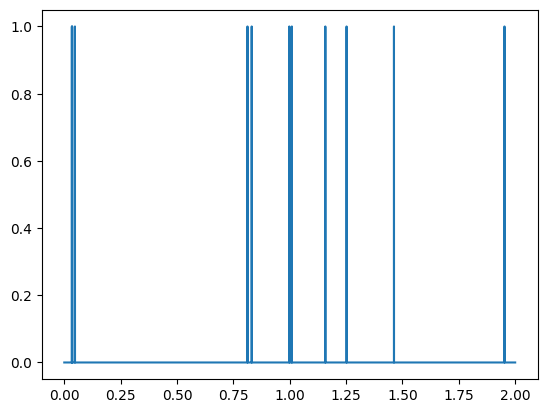

In [85]:
wave.plot()

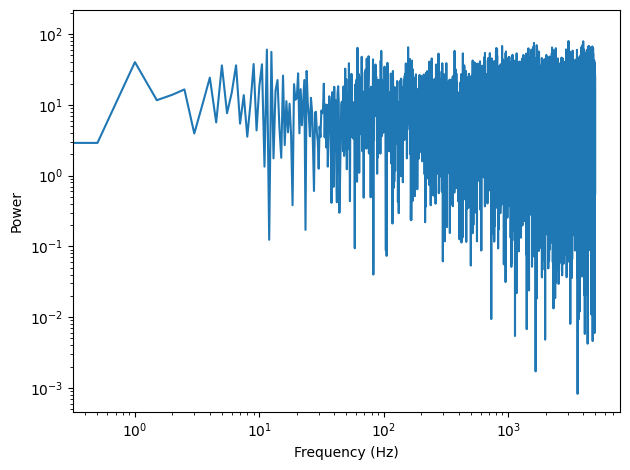

In [86]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

Теперь создадим такой же сигнал, но с большей амплитудой

In [87]:
signal = UncorrelatedPoissonNoise(amp=1)
wave = signal.make_wave(duration=2, framerate=10000)
wave.make_audio()


Теперь звук похож на белый шум

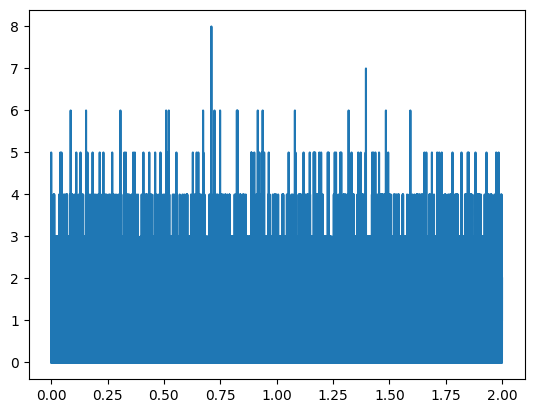

In [89]:
wave.plot()

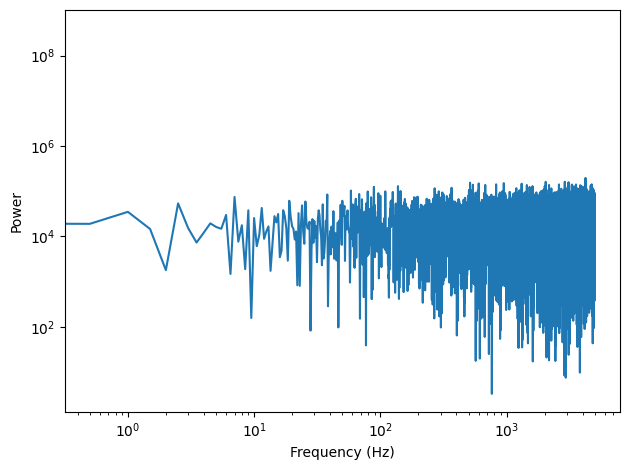

In [88]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

# Глава 4.5

Реализуем алгоритм Voss-McCartney для генерации розового шума:

In [91]:
def voss(nrows, ncols=16):
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

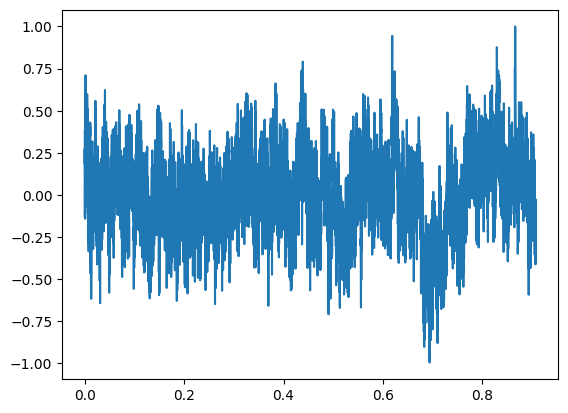

In [92]:
ys = voss(10000)
ys
wave = Wave(ys)
wave.unbias()
wave.normalize()
wave.plot()

Прослушаем полученный сигнал:

In [93]:
wave.make_audio()

Получим спектр:

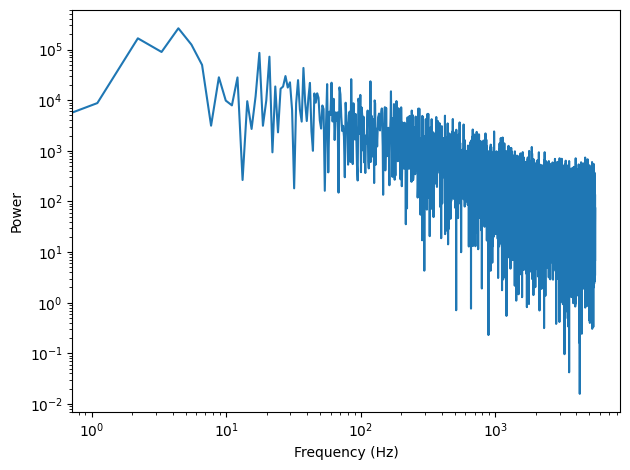

In [94]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)